# Linear Regression
This is an example of how to solve a linear regression problem using the normal equation method and the gradient descent method.

Suppose a company was interested in finding out how much their revenue would increase as they increased investment in advertising.  This would require a method of predicting increase in revenue as a function of money spent on advertising.  Using a two-feature dataset of money spent on advertising and revenue increase in thousands of dollars, a linear regression model is ideal for predicting how much revenue will increase given a particular advertising budget.

Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load data from an Excel spreadsheet into a Numpy array, and visualize using a scatter plot.

shape of original data: (97, 2)


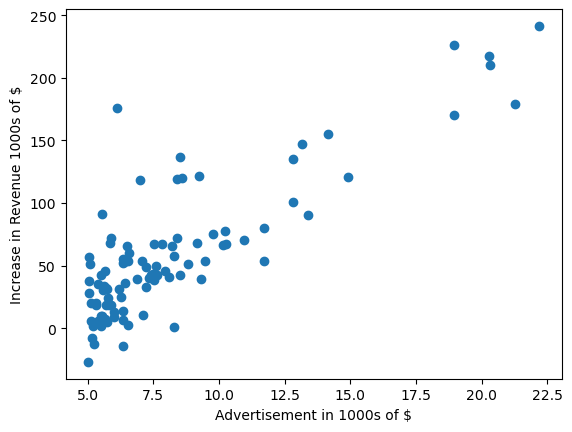

In [2]:
# Load data

# Load data from Excel into a pandas DataFrame
# df = pd.read_excel('linReg_data.xlsx')
df = pd.read_excel(r'C:\Users\rober\OneDrive\Side Projects\Programming\Machine Learning\Linear_Regression\linReg_data.xlsx')

# Extract the two columns and convert them to a NumPy array
data = df[['x', 'y']].to_numpy()

print('shape of original data:', data.shape) # Check if data is 97 by 2

# Plot original data
x = data[:, 0]   # feature data
y = data[:, -1]  # label/ground truth data

plt.scatter(x, y)

# labels
plt.xlabel('Advertisement in 1000s of $')
plt.ylabel('Increase in Revenue 1000s of $')

plt.show()

Implement the Normal Equation method for linear regression: $\theta = (X'^T X')^{-1}X'^T y$

Use the learned $\theta$ to make predictions: $\hat{y} = X'\theta$

Compute the residual sum of squares of the model: $RSS = \sum_i (\hat{y}^{(i)} - y^{(i)})^2$

Draw the straight line representing linear regression on the scatter plot

Compute predicted revenue increase for an $18000 advertisement budget

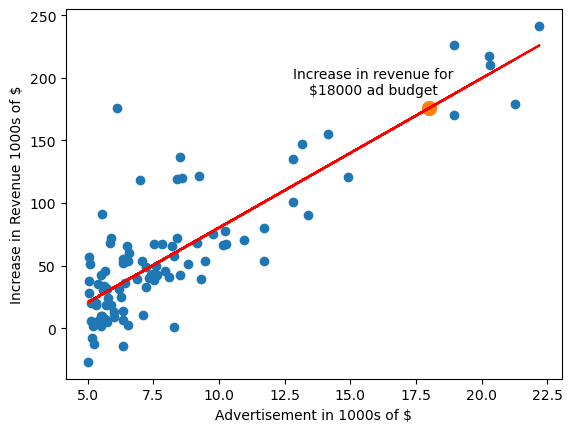

Theta obtained from normal equation: [-38.95780878  11.93033644]
Residual sum of squares (RSS):  86853.24469391847
Predicted increase in revenue with $18000 advertisement budget: $ 175788.25


In [4]:
""" Create matrix Xprime and y
    Xprime has two columns:
      - The first column contain all 1s, which is for the intercept
      - The second column contains the feature, i.e., the 1st column of data_norm
      - y has one column, i.e., the 2nd column of data_norm
"""

Xprime = np.ones_like(data)  # add column of 1's to facilitate bias term calculation

Xprime[:,1] = data[:, 0]  # add feature data to Xprime matrix
y = data[:,-1]

""" Compute theta_method1 using normal equation method """
Xprime_T = Xprime.T

Xprime_T_dot_X = np.dot(Xprime_T, Xprime)
dot_op_inverse = np.linalg.inv(Xprime_T_dot_X)
Xprime_T_dot_y = np.dot(Xprime_T, y)

theta_method1 = np.dot(dot_op_inverse, Xprime_T_dot_y)

""" Use the theta obtained to make predictions and compute the residuals """
# Compute y_hat
y_hat = np.matmul(Xprime, theta_method1)

""" Compute residuals "RSS1" """
RSS1 = np.sum((y_hat - y)**2)

""" Predict increase in revenue with $18000 advertisement budget, "y_pred" """
ad_budget = 18

# create X_pred using new data to be used for prediction
x_pred = np.array([1, ad_budget])
y_pred = np.dot(x_pred, theta_method1)


""" Draw a straight line representing linear regression on the scatter plot with sample data """
x = data[:, 0]
plt.scatter(x, y)               # sample data
plt.plot(x, y_hat, 'r')         # linear regression line
plt.scatter(ad_budget, y_pred, s=100)  # predicted increase in revenue with $18000 advertisement budget
plt.annotate('Increase in revenue for\n$18000 ad budget', (ad_budget, y_pred), textcoords="offset points", xytext=(-40, 10), ha='center')

# labels
plt.xlabel('Advertisement in 1000s of $')
plt.ylabel('Increase in Revenue 1000s of $')

plt.show()

#### END YOUR CODE ####


#### DO NOT CHANGE THE CODE BELOW ####
print('Theta obtained from normal equation:', theta_method1)
print('Residual sum of squares (RSS): ', RSS1)
print ('Predicted increase in revenue with $18000 advertisement budget: $', round(y_pred*1000,2))

Implement the Gradient Descent method for linear regression with one feature.

The cost function: $J(b, w) = \frac{1}{2m}\sum_i (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2m}\sum_i (b + w x_1^{(i)}-y^{(i)})^2$

Gradients w.r.t. parameters: $\frac{\partial J}{\partial \theta} = \begin{cases}\frac{\partial J}{\partial b}\\ \frac{\partial J}{\partial w}\\ \end{cases} = \begin{cases}\frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})\\ \frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})x_1^{(i)}\\\end{cases}$

The formula to update parameters at each iteration: $\theta := \theta - \alpha * \frac{\partial J}{\partial \theta}$

In [5]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Params
        X - Shape: (m,2); m is the number of data examples
        y - Shape: (m,)
        theta - Shape: (2,)
        num_iters - Maximum number of iterations
    Return
        A tuple: (theta, RSS, cost_array)
        theta - the learned model parameters
        RSS - residual sum of squares
        cost_array - stores the cost value of each iteration. Its shape is (num_iters,)
    """
    m = len(y)
    cost_array =[]

    for i in range(0, num_iters):
        # Shape of y_hat: m by 1
        y_hat = np.dot(X, theta)

        # Compute the difference between prediction (y_hat) and ground truth label (y)
        diff = y_hat - y

        # Compute the cost
        cost_function = (1 / (2 * m)) * (np.sum(diff**2))
        cost_array.append(cost_function)

        # Compute gradients
        # Shape of gradients is the same as theta -> (n + 1) x 1
        grad_wrt_b = (1 / m) * (np.sum(diff))
        grad_wrt_w = (1 / m) * (np.sum(diff * X[:, -1]) )

        gradient = np.array([grad_wrt_b, grad_wrt_w])

        # Update theta
        theta = theta - alpha * gradient

    # Compute residuals
    RSS = np.sum((y_hat - y)**2)

    return theta, RSS, cost_array

Test gradientDescent function

In [6]:
# This cell evaluates the gradientDescent function implemented above

# Define learning rate and maximum iteration number
ALPHA = 0.01
MAX_ITER = 5000
# MAX_ITER = 100  # for testing

# Initialize theta to [0,0] (this effectively initializes w and b to 0)
theta = np.zeros(2)
theta_method2, RSS2, cost_array = gradientDescent(Xprime, y, theta, ALPHA, MAX_ITER)

print('Theta obtained from gradient descent:', theta_method2)
print('Residual sum of squares (RSS): ', RSS2)

Theta obtained from gradient descent: [-38.95300511  11.92985386]
Residual sum of squares (RSS):  86853.24510293968


Expected Output from gradientDescent test:

Theta obtained from gradient descent: [-38.95300511  11.92985386]<br>
Residual sum of squares (RSS):  86853.24510146641<br>
Check to see that the result is the close to that obtained via normal equation method

Plot the cost against iteration number to visualize the performance of gradient descent.

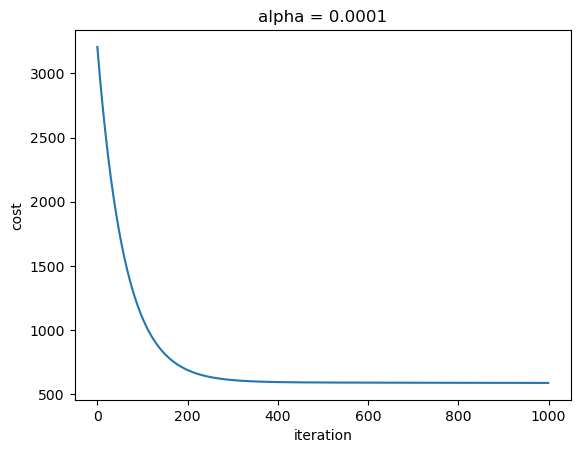

In [12]:
alpha = 0.0001
# alpha = 0.02
# alpha = 0.001
MAX_ITER = 1000
theta = np.zeros(2)

_, _, cost_array = gradientDescent(Xprime, y, theta, alpha, MAX_ITER)

plt.plot(range(0,len(cost_array)), cost_array);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}'.format(alpha))
plt.show()